# Introduction

The objective of applying a machine learning model to credit scoring is to build models that can precisely 
differentiate between customers that are likely to repay and default.
The credit industry has substantial economic importance. As of March 2022, total gross consumer lending excluding student loans in UK are over £26bn (Statista). 
Additionally, it is in the Basel II Capital accords where it is necessary for banks and other financial institutions to estimate the probability of default (BIS). 
However, the quantity of customers makes it very difficult to identify credit scores manually. 
These factors demonstrate that financial institutions require powerful quantitative tools to make smart credit decisions as it would greatly affect their profit margins. 

The nature of credit scoring can be defined as a classification problem.  Machine learning models will learn on identifying customer's characteristics based on their financial and 
credit credentials and use it to define whether their credit scores are good or not. In this assignment, the application of machine learning methodologies will be thoroughly applied 
in order to create the prediction model, as well as insights into credit scoring.

Application of material from SMM284 module:
| Week | Methodology | Application |
| --- | --- | --- |
| 1 | Classification Models | LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier and SVC machine learning models were implemented to our analysis to carry out multi-classification of customer Credit Score labels. |
| 1 | Model Evaluation | classification_report was utilised to evaluate the predictions of all trained machine learning models through accuracy. |
| 2 + 3 | Preprocessing | The data was thoroughly examined to identify inaccurate data points and detect NA values. Moreover, imputation of NA values was applied using mean or mode. |
| 2 + 3 | EDA | Visualisation of the dataset using histogram and box plot charts through matplotlib were used to explore the distribution, assess skewness and detect outliers for each feature. Moreover the correlation matrix was analysed to detect strongly correlated relationships between numerical variables. |
| 2 + 3 | Feature Engineering | Transformations were carried out after preprocessing and EDA stages to address skewness issue and prepare categorical features for model training. Furthermore, StratifiedShuffleSplit was implemented to ensure the proportion of each Credit Score label remains consistent from training to testing. |
| 2 + 3 | Tuning Classification Models | GridSearchCV was applied to DecisionTreeClassifier and RandomForestClassifier for tuning to identify the best model parameters that result in the highest accuracy. |
| 4 | NLP / textual machine learning | None - Did not deal with textual data. |
| 5 | Deep Learning | Simple Neural Network and CNN models were implemented through the tensorflow package for multi-classification of customer Credit Score labels by setting a softmax activation function in the final layer. |

# Import Packages and Dataset

In [1]:
import pandas as pd
import numpy as np
import re
from collections import Counter
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
import tqdm
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
import tensorflow as tf

# suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import train data from csv
dfm = pd.read_csv('data/train.csv')

## Description of Dataset

Link to dataset: https://www.kaggle.com/datasets/parisrohan/credit-score-classification?select=train.csv

Our dataset contains information on customers from a global financial company, consisting of 100,000 rows and 28 columns. 
Each row and column represents a customer data and their features respectively. The dataset contains 8 separate months of credit information on 
12,500 unique customers, covering January to August of a calendar year.

In [3]:
# preview the dataframe
dfm.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


27 features were provided, ranging from personal to credit-orientated. 
Our columns consist of 19 categorical (dtype = object) and 8 numerical (dtype = float64 and int64). The summary of the features are shown below:

- ID: Represents a unique identification of an entry
- Customer_ID: Represents a unique identification of a person
- Month: Represents the month of the year
- Name: Represents the name of a person
- Age: Represents the age of the person
- SSN: Represents the social security number of a person
- Occupation: Represents the occupation of the person
- Annual_Income: Represents the annual income of the person
- Monthly_Inhand_Salary: Represents the monthly base salary of a person
- Num_Bank_Accounts: Represents the number of bank accounts a person holds
- Num_Credit_Card: Represents the number of other credit cards held by a person
- Interest_Rate: Represents the interest rate on credit card
- Num_of_Loan: Represents the number of loans taken from the bank
- Type_of_Loan: Represents the types of loan taken by a person
- Delay_from_due_date: Represents the average number of days delayed from the payment date
- Num_of_delayed_Payment: Represents the average number of payments delayed by a person
- Changed_Credit_Limit: Represents the percentage change in credit card limit
- Num_Credit_Inquiries: Represents the number of credit card inquiries
- Credit_Mix: Represents the classification of the mix of credits
- Outstanding_Debt: Represents the remaining debt to be paid (in USD)
- Credit_Utilization_Ratio: Represents the utilization ratio of credit card
- Credit_History_Age: Represents the age of credit history of the person
- Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person
- Total_EMI_per_month: Represents the monthly EMI payments (in USD)
- Amount_invested_monthly: Represents the monthly amount invested by the customer (in USD)
- Payment_Behaviour: Represents the payment behavior of the customer (in USD)
- Monthly_Balance: Represents the monthly balance amount of the customer (in USD)


Further cleaning will be required as some categorical columns are better suited as numerical (e.g. `Occupation`)

In [4]:
# dataframe info
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

The final column is the label of the dataset, which is the `Credit_Score`. This is the output label that the model will have to predict for each customer. 
A brief summary of credit score is noted down below:

- **Credit_Score**: Represents the bracket of credit score (Poor, Standard, Good)

In the dataset, there are 3 unique classes of `Credit_Score`. The data is imbalanced, with 'Standard' credit score attributing to 53.2%, much higher than its 
counterparts (Good = 17.8%, Poor = 29.0%).



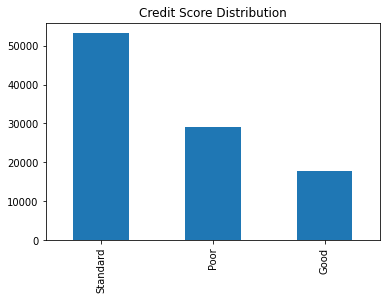

Standard    0.53174
Poor        0.28998
Good        0.17828
Name: Credit_Score, dtype: float64


In [5]:
# plot ratio of credit score in the dataset
dfm['Credit_Score'].value_counts().plot(kind='bar')
plt.title('Credit Score Distribution')
plt.show()

# print credit score value count via percentage
print(dfm['Credit_Score'].value_counts(normalize=True))

# Part 1: Exploring issues in the Dataset

The main purpose of this part is to identify the possible issues within the dataset that might negatively impact the future analysis and prediction process.
This will establish the current issues that require immediate fixing, and help with planning the cleaning process.

## 1.1 "_" symbols in text data


The first issue found after looking in detail at the dataset is that there are symbols, in this case, underscores, in some columns, which are not supposed to appear. 
This will be required to remove so the values can be represented as integers. An example of the issue mentioned can be found below:

In [6]:
# extract Customer ID from Age and Outstanding Debt columns by searching text containing "_" symbol
sample_id = list(dfm[dfm["Age"].apply(lambda x:'_' in str(x))].head(5)['ID']) + list(dfm[dfm["Outstanding_Debt"].apply(lambda x:'_' in str(x))].head(5)['ID'])

# filter dataframe based on the extracted Customer IDs
dfm[['ID', 'Age', 'Outstanding_Debt']].loc[dfm['ID'].isin(sample_id)]

,ID,Age,Outstanding_Debt
8,0x160e,28_,605.03
54,0x1650,34_,352.16
58,0x1658,30_,1704.18
71,0x1669,24_,1377.74
87,0x1681,41,1328.93_
89,0x1687,33_,950.36
142,0x16d4,46,1283.37_
368,0x182a,27,2797.17_
632,0x19b6,21,3818.57_
703,0x1a1d,28,343.84_


## 1.2 Missing values

The second issue is the missing values within the dataset across different columns which will require to be imputed in the cleaning process.

The identified columns with missing values are: `Name`, `Occupation`, `Monthly_Inhand_Salary`, `Type_of_Loan`, `Credit_History_Age`, `Num_Credit_Inquiries`, 
`Num_of_Delayed_Payment`, `Amount_invested_monthly` and `Monthly_Balance`. 

An example of missing information from one customer can be found below:

In [7]:
# filter dataframe based on "CUS_0x2dbc"
dfm[dfm['Customer_ID'] == 'CUS_0x2dbc']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
16,0x161a,CUS_0x2dbc,January,Langep,34,486-85-3974,_______,143162.64,12187.22,1,...,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413702679309,!@9#%8,1043.3159778669492,Good
17,0x161b,CUS_0x2dbc,February,NaN,34,486-85-3974,Engineer,143162.64,12187.22,1,...,Good,1303.01,41.702573,17 Years and 10 Months,No,246.992319,232.86038375993544,High_spent_Small_value_payments,998.8692967863226,Good
18,0x161c,CUS_0x2dbc,March,Langep,34,486-85-3974,_______,143162.64,NaN,1,...,Good,1303.01,26.519815,17 Years and 11 Months,No,246.992319,__10000__,High_spent_Small_value_payments,715.741367403555,Good
19,0x161d,CUS_0x2dbc,April,Langep,34,486-85-3974,Engineer,143162.64,12187.22,1,...,_,1303.01,39.501648,NaN,No,246.992319,825.2162699393922,Low_spent_Medium_value_payments,426.5134106068658,Good
20,0x161e,CUS_0x2dbc,May,Langep,34,486-85-3974,_______,143162.64,12187.22,1,...,Good,1303.01,31.376150,18 Years and 1 Months,No,246.992319,430.9475278803298,Low_spent_Large_value_payments,810.7821526659284,Good
21,0x161f,CUS_0x2dbc,June,Langep,34,486-85-3974,Engineer,143162.64,12187.22,1,...,Good,1303.01,39.783993,18 Years and 2 Months,No,246.992319,257.80809942568976,High_spent_Medium_value_payments,963.9215811205684,Good
22,0x1620,CUS_0x2dbc,July,NaN,34,486-85-3974,Engineer,143162.64,12187.22,1,...,Good,1303.01,38.068624,18 Years and 3 Months,No,246.992319,263.17416316163934,High_spent_Small_value_payments,968.5555173846187,Standard
23,0x1621,CUS_0x2dbc,August,Langep,34,486-85-3974,Engineer,143162.64,12187.22,1,...,Good,1303.01,38.374753,18 Years and 4 Months,No,246.992319,__10000__,High_spent_Small_value_payments,895.494583180492,Standard


## 1.3 Unreasonable data points

Another issue found in the dataset is the unreasonable values in some of the columns. In this case, as shown below, there are negative number values for age of the customers and unreadable signs within 
`Payment_Behaviour` column, which will need to be cleaned in the next step. 

In [8]:
# extract Customer ID from Age and Outstanding Debt columns by searching text containing "-" symbol and "!@9#%8" text respectively
sample_id = list(dfm[dfm["Age"].apply(lambda x:'-' in str(x))].head(5)['ID']) + list(dfm[dfm['Payment_Behaviour']=='!@9#%8'].head(5).head(5)['ID'])

# filter dataframe based on the extracted Customer IDs
dfm[['ID', 'Age', 'Payment_Behaviour']].loc[dfm['ID'].isin(sample_id)].sort_values(by='Age')

,ID,Age,Payment_Behaviour
2,0x1604,-500,Low_spent_Medium_value_payments
113,0x16ab,-500,Low_spent_Small_value_payments
289,0x17b3,-500,High_spent_Small_value_payments
340,0x17fe,-500,Low_spent_Large_value_payments
560,0x194a,-500,High_spent_Small_value_payments
32,0x1632,21,!@9#%8
5,0x1607,23,!@9#%8
47,0x1645,31,!@9#%8
16,0x161a,34,!@9#%8
54,0x1650,34_,!@9#%8


## 1.4 Multiple information in a single column

The `Type_of_Loan` column contains all the different types of loans that each customer has requested in the credit history grouped together. 
The current format of the column might not be able to extract useful information for the analysis therefore, 
some modifications will be needed to fit a training model. An example of the content of the column can be found below:

In [9]:
# print 10 unique values from 'Type_of_Loan' column
for text in range(10):
    print(dfm['Type_of_Loan'].unique()[-text])

Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan
Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan
Payday Loan, Student Loan, Mortgage Loan, and Not Specified
Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan
Home Equity Loan, Payday Loan, Not Specified, and Personal Loan
Auto Loan, Payday Loan, Auto Loan, Student Loan, Student Loan, Student Loan, and Home Equity Loan
Payday Loan, Credit-Builder Loan, Mortgage Loan, Home Equity Loan, and Payday Loan
Home Equity Loan, Not Specified, Student Loan, and Mortgage Loan
Mortgage Loan, Auto Loan, Payday Loan, Not Specified, and Student Loan
Student Loan, Mortgage Loan, Debt Consolidation Loan, Home Equity Loan, Student Loan, Home Equity Loan, and Student Loan


## 1.5 Credit_History_Age represented as text

The last issue discovered in the data is in the column of `Credit_History_Age`, which represents the age of credit history of each customer. 
In this case, the age is counted by years and months, as shown below. The format might need to be modified to ease the analysis process. 

In [10]:
# print 5 unique values from 'Credit_History_Age' column
for text in range(5):
    print(dfm['Credit_History_Age'].unique()[-text])

22 Years and 1 Months
2 Years and 1 Months
4 Years and 3 Months
4 Years and 2 Months
4 Years and 1 Months


# Part 2: Cleaning the Dataset

After identifying all the aspects of the dataset that might create issues for the analysis process, 
the next step is the cleaning process, which will mainly consist on solving the problems mentioned in the previous section. 

## 2.1 Deal with text containing "_" symbols

As mentioned previously, some of the values in the columns contain underscores which need to be removed. In this case, the main approach used is to first replace the underscore in all the numerical columns with blank space, and afterwards, into null values. 
The same approach was used in `Occupation` since underscore symbols were also present within this column. 

In [11]:
# Replace '_' symbols in the values of the numerical columns from the dataframe NA
numeric_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 
                   'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
                   'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
                   'Num_Credit_Inquiries', 'Outstanding_Debt',
                   'Credit_Utilization_Ratio', 'Total_EMI_per_month',
                   'Amount_invested_monthly', 'Monthly_Balance']
dfm[numeric_columns] = dfm[numeric_columns].replace('_', '', regex=True).replace('', np.nan).astype(float)

# Replace '_______' symbols in 'Occupation' column specifically with NA
dfm['Occupation'] = dfm['Occupation'].replace('_______', '', regex=True).replace('', np.nan)

## 2.2 Deal with unreasonable values

Some of the columns present unusual values that were not reasonable, such as the case for `Payment_Behaviour` and `SSN`. In this case, the main approach is to replace these values with blank space.

The presence of negative values in the columns `Age`, `Num_Bank_Accounts`, `Num_of_Loan` and `Monthly_Balance` will be firstly replaced with null values and filled in the next stage. 

After the replacement, the verification of the minimum values in these columns was proceeded to make sure that no more negative values were present.

In [12]:
# Replace weird values in the columns (eg. #F%$D@*&8)
dfm['Payment_Behaviour'] = dfm['Payment_Behaviour'].str.replace('!@9#%8', '')
dfm['SSN'] = dfm['SSN'].str.replace('#F%$D@*&8', '')

# Deal with negative values in the columns (eg. -500 in Age column)
negative_columns = ["Num_Bank_Accounts", "Num_of_Loan", "Monthly_Balance"]
for c in negative_columns:
    dfm[c] = dfm[c].apply(lambda x: np.nan if x<0 else x)

# Deal with negative values and unrealistic large values in Age column
dfm['Age'] = [i if 0< i < 100 else np.nan for i in dfm['Age'].astype(float)]

# print minimum values of previously negative columns
dfm.describe().loc['min'][['Age']+negative_columns]

Age                  14.00000
Num_Bank_Accounts     0.00000
Num_of_Loan           0.00000
Monthly_Balance       0.00776
Name: min, dtype: float64

## 2.3 Impute NA values

As shown in previous sections, there were missing values within the dataset, which will be filled in order to keep the largest amount of observation as possible for the analysis process. 

In this case, different methodologies were used to fill the null values of the dataset:

- For columns where the value across all the months remains the same for each customer, such as `Name`, `Occupation`, `Age`, `Num_Credit_Inquiries`, `Type_of_Loan`, and `SSN`, the method used to fill the null values is by the mode value of each customer in the columns.  In case where the null value is the most repeated one (mode) in a column for a customer, then the unique value for the customer in that column will be used as the replacement methodology.
- In terms of the numerical columns that vary across the 8 months period for each customer, the methodology used to fill the null values is through the mean value of the customer in each particular column. In this case, the columns with null values were `Num_of_Delayed_Payment`, `Amount_invested_monthly`,  and `Monthly_Inhand_Salary`.

In [13]:
# helper function to fill NA values in the dataframe
def fill_na_with_mode(df, column):
    df[column] = df[column].fillna(df.groupby('Customer_ID')[column].transform(statistics.mode))
    return df

def fill_na_with_mean(df, column):
    df[column] = df[column].fillna(df.groupby('Customer_ID')[column].transform(pd.Series.mean))
    return df

# fill na with unique value of the customer - repeated data
def fill_na_with_only_value(df, column):
    temp_dfm = dfm[[column,'Customer_ID']].dropna()
    # mapping customer id to type of loan
    id_to_column = temp_dfm.drop_duplicates().set_index('Customer_ID').to_dict()[column]
    df[column] = df['Customer_ID'].map(id_to_column)
    return df

# fill NA values in the df with the mode value of the column
for col in tqdm.tqdm(['Name','Occupation','Age','Num_Credit_Inquiries','Type_of_Loan','SSN']):
    fill_na_with_mode(dfm, col)

# if the NA is the mode value, then fill it by mapping the customer id to that column
for col in tqdm.tqdm(['Name','Occupation','Age','Num_Credit_Inquiries','Type_of_Loan','SSN']):
    fill_na_with_only_value(dfm, col)

# fill NA values in the df with the mean value of the column
for col in tqdm.tqdm(['Num_of_Delayed_Payment','Amount_invested_monthly','Monthly_Inhand_Salary']):
    fill_na_with_mean(dfm, col)

100%|██████████| 3/3 [00:03<00:00,  1.08s/it]


## 2.4 Split Type_of_Loan into multiple columns

The modification made to the `Type_of_Loan` column is to split the different types of loans into different columns and count the frequency that each customer has applied for them in these 8 months in order to better analyse the relationship between the type of loan and the credit score level. 

In [14]:
# Split Type_of_Loan into multiple columns
all_loan_types = ['Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan',
                  'Home Equity Loan', 'Mortgage Loan', 'Not Specified',
                  'Payday Loan', 'Personal Loan', 'Student Loan']

dfm_without_na = dfm.dropna(subset=['Type_of_Loan'])

for i in all_loan_types:
    dfm_without_na[i] = dfm_without_na['Type_of_Loan'].apply(lambda x: len(re.findall(i, x)))
    dfm_without_na[i] = dfm_without_na[i].fillna(0)

dfm = pd.merge(dfm, dfm_without_na[all_loan_types], left_index=True, right_index=True, how='left')

# deal with the abnormal values in Num_of_Loan
dfm['Num_of_Loan'] =  dfm[all_loan_types].sum(axis=1)

## 2.5 Convert `Credit_History_Age` from text to numerical

As mentioned in part 1, the value of this column was in years and months to compute the age of the credit history of each customer. To ease the analysis process, the modification of the values all into months was made.

Furthermore, there were missing values in this column for some customers, which have also been filled. For the same customer, the value of this column was cumulative after each month. Therefore, the methodology used to fill the missing values was to find the first non-missing value of the column for each customer and subtract it by its index in order to obtain the value of the first month. Once obtained, the value for the rest of the months could be computed based on the first month by adding one unit.

In [15]:
# Extract the first number - Year
year = dfm['Credit_History_Age'].str.findall(r'\d+').apply(lambda x: int(x[0]) if type(x) !=float else np.nan)
# Extract the second number - Month
month = dfm['Credit_History_Age'].str.findall(r'\d+').apply(lambda x: int(x[1]) if type(x) !=float else np.nan)

# Convert the year and month to total number of months
dfm['Credit_History_Age_in_months'] = 12 * year + month

# some data points for Credit_History_Age is missing for each customer
# but we can infer the value from the other data points
unique_customer_id = dfm[dfm['Credit_History_Age_in_months'].isna()]['Customer_ID'].unique()

for i in tqdm.tqdm(unique_customer_id):
    temp_dfm = dfm[dfm['Customer_ID'] == i].reset_index(drop=True)
    index = 0
    for j in temp_dfm['Credit_History_Age_in_months']:
            if not np.isnan(j):
                dfm.loc[dfm['Customer_ID'] == i, 'Credit_History_Age_in_months'] = temp_dfm['Credit_History_Age_in_months'][index]
                break
            index += 1
    # the clients' Credit_History_Age_in_months in the eight months range from the dataframe should be calculated by following formula
    month = list(range(int(temp_dfm.loc[index,'Credit_History_Age_in_months']-index),int(temp_dfm.loc[index,'Credit_History_Age_in_months']-index+8)))
    dfm.loc[dfm['Customer_ID'] == i, 'Credit_History_Age_in_months'] = month

100%|██████████| 6650/6650 [01:50<00:00, 60.43it/s]


## 2.6 Drop remaining NA rows 

After trying to fill the missing values of the columns, some observations remained unfilled mainly caused by the lack of information across the 8 months and the lack of presence of a pattern in the column values to make reasonable imputations. Therefore, the final decision was to drop those observations with null values after the whole cleaning process.

In [16]:
# checking how many rows are removed
print(f"# of data before removing NA: {len(dfm)}")
dfm = dfm.dropna(axis=0)
print(f"# of data after removing NA: {len(dfm)}")

# of data before removing NA: 100000
# of data after removing NA: 77833


In [17]:
# final check for NA values
dfm.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
Auto Loan                       0
Credit-Builder

In [18]:
# # save the cleaned dataframe to csv
# dfm.to_csv('data/cleaned_dfm.csv', index=False)

# Part 3: Exploratory Data Analysis

In [19]:
# read the cleaned dataframe from csv
dfm = pd.read_csv('data/cleaned_dfm.csv')

## 3.1 Visualize distribution of data using histograms and boxplots

Histogram and box plot charts were utilised to visualise the distribution of numerical variables from the dataset to assess skewness and identify outliers. The histogram plot shows that `Monthly_Inhand_Salary` and `Outstanding_Debt` variables contain some segments hence we can easily split them into buckets to summarise the data.

Furthermore, based on both the histogram and box plots, the following variables appear to be very positively skewed: `Annual_Income`, `Num_Bank_Accounts`, `Num_Credit_Card`, `Interest_Rate`, `Num_of_Delayed_Payment`, `Num_Credit_Inquiries`, `Total_EMI_per_month`, and `Amount_invested_monthly`.

Therefore, log transformations should be applied to these numerical variables to solve the positive skewness issue. In addition, outliers were detected in several columns but none were removed because the figures were realistic.

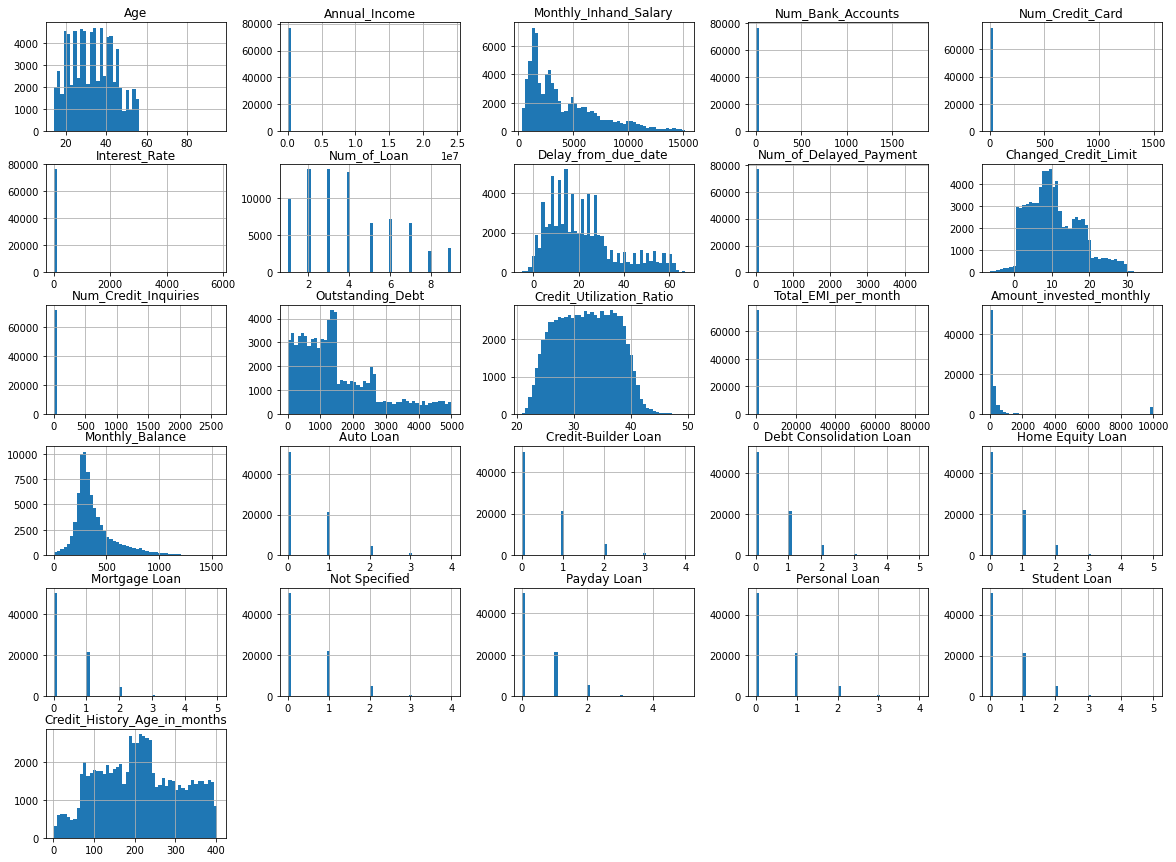

In [20]:
# visualize the distribution of each column using histograms
dfm.hist(bins=50, figsize=(20,15))
plt.show()

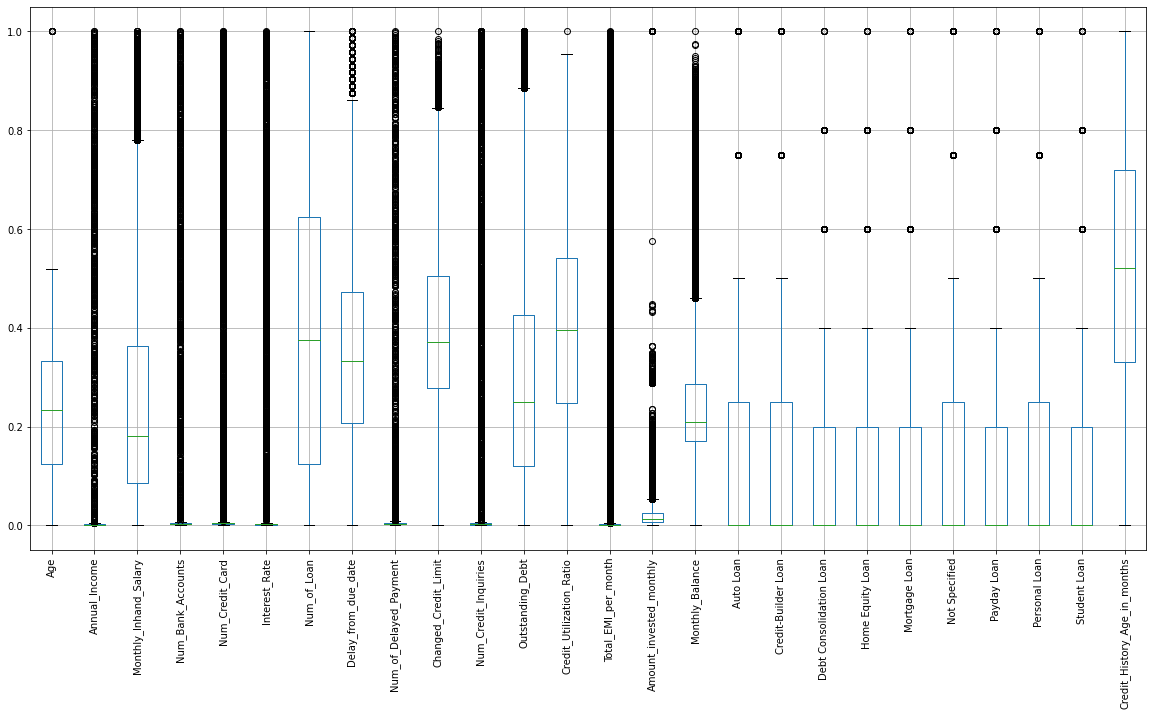

In [21]:
# apply min-max scaling and visualize the distribution of each column using boxplots
dfm_minmax = dfm.copy()
numeric_columns = dfm.select_dtypes(include=['int64','float64']).columns
for col in numeric_columns:
    dfm_minmax[col] = (dfm_minmax[col] - dfm_minmax[col].min()) / (dfm_minmax[col].max() - dfm_minmax[col].min())

# visualize the distribution of each column using boxplots
dfm_minmax.boxplot(figsize=(20,10), rot=90)
plt.show()

## 3.2 Heatmap of correlation between variables

The highest correlation coefficient was 0.69 between `Monthly_Balance` and `Monthly_Inhand_Salary` but neither variables were dropped because it is likely for customers to have high monthly income and low monthly balance hence the variation should be represented. Moreover, correlation coefficient is __not__ close to 1, which means it is __not__ strongly correlated.

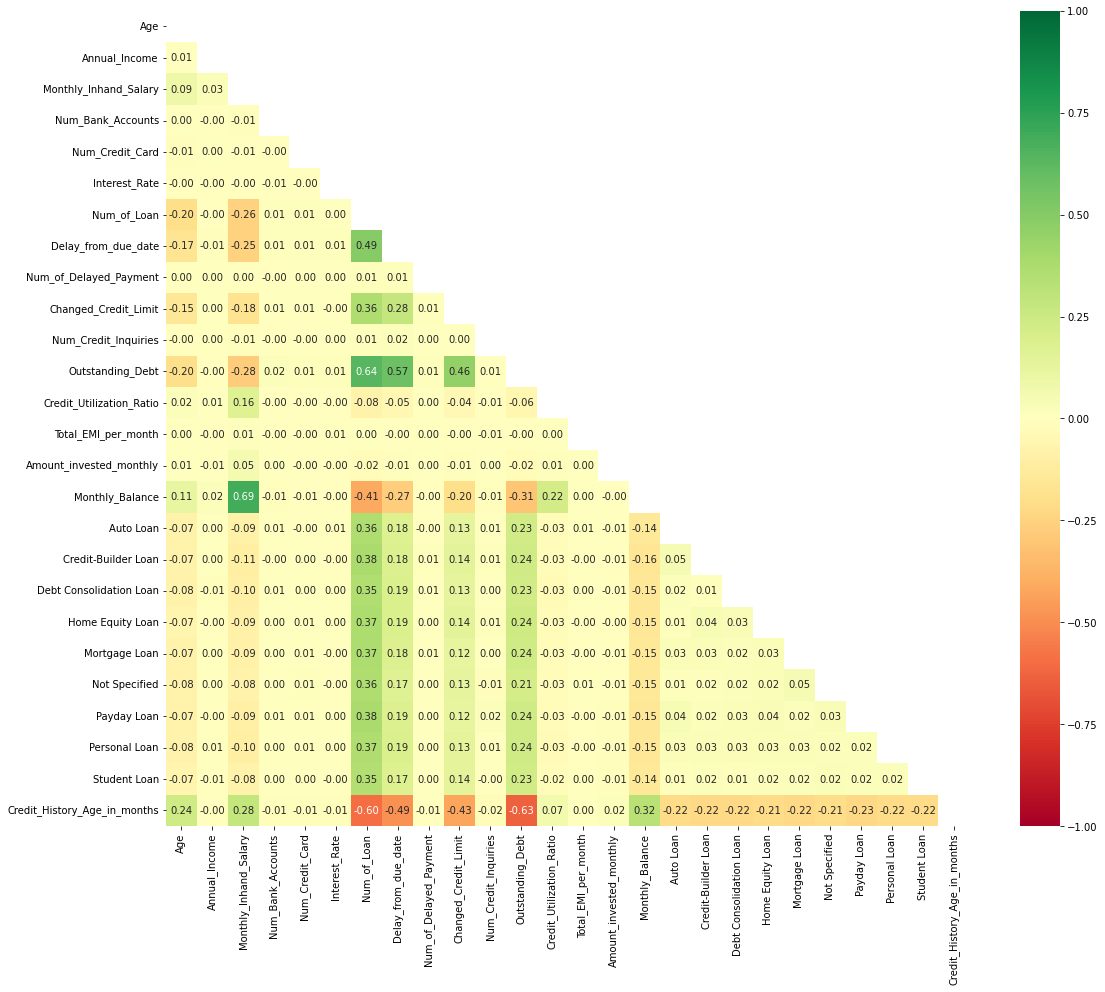

In [22]:
# plot correlation matrix
fig = plt.figure(figsize=(18,15))
sns.heatmap(dfm.corr(), mask=np.triu(np.ones_like(dfm.corr(), dtype=bool)), 
            annot=True, fmt='.2f', cmap='RdYlGn', vmin=-1, vmax=1)
plt.show()

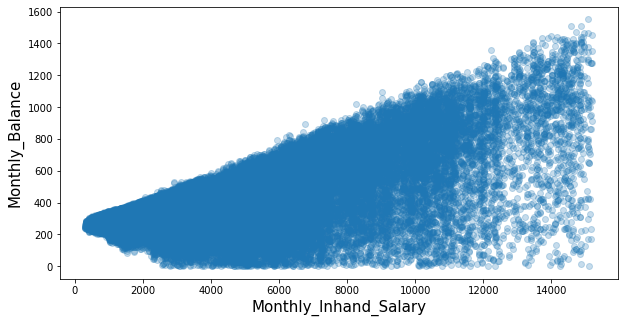

In [23]:
# plot Monthly_Balance against Monthly_Inhand_Salary
fig = plt.figure(figsize=(10,5))
plt.scatter(dfm['Monthly_Inhand_Salary'], dfm['Monthly_Balance'], alpha=0.25)
plt.xlabel('Monthly_Inhand_Salary', fontsize=15)
plt.ylabel('Monthly_Balance', fontsize=15)
plt.show()

## 3.3 Explore relation of Occupation against Credit Score

The majority of customers are within the standard Credit Score segment. Moreover, each occupation is similarly represented within each Credit Score segment (Good, Standard and Poor) but some fluctuations were observed between occupations in each credit score segment hence, the Occupation variable will be retained and converted to dummy variables in the next part.

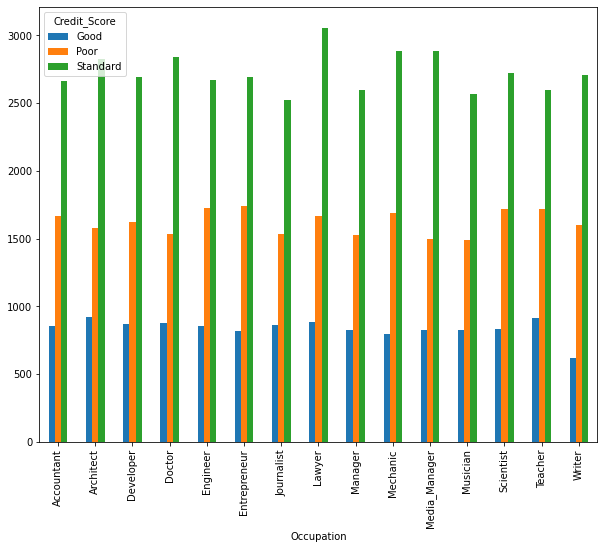

In [24]:
# explore the relationship between the occupation and the credit score
pd.crosstab(dfm['Occupation'], dfm['Credit_Score']).plot.bar(rot=0, figsize=(10,8))
plt.xticks(rotation=90)
plt.show()

# Part 4: Preprocessing and Feature Engineering

Feature selection and engineering is important in credit scoring as financial data contains a large sum of irrelevant and redundant features. 
The importance of feature selection in credit scoring is highlighted in Ha and Nguyen’s (2016) research, where different feature selection models were tested and the accuracy of the classifiers 
increased when fewer features were selected. Additionally, fewer features allows the credit department to concentrate on collecting relevant variables only. 
As such we dropped columns such as `ID`, `Month`, `Name` and `SSN` that had no real interpretation to our classifier. As part of our feature engineering we applied dummy encoding to non-ordinal categorical variables 
such as `occupation`, `credit_mix` and `payment_behaviour` using the get_dummies function. 
The dependent variable `credit_score` is ordinal and we transformed it using a label encoder.
Furthermore, we transformed columns that were skewed through logarithmic transformation and segmenting into bins.

Based on the Principal Component Analysis carried out below, the number of components required to explain around 90% of the variance is around 25 components, which is half of the dimension / total number of columns after carrying out preprocessing and feature engineering steps. However, the drawback of utilizing the 25 components would be the difficulty in interpretation since PCA could not summarize the information efficiently i.e. explaining 90% of the variance through 2 - 4 components. Therefore, PCA was not implemented, and the original dataset was utilized after preprocessing and featuring engineering procedures.

## 4.1 Dropping Columns

From our original dataset, 5 columns were dropped as a result. These columns are the following: `ID`, `Customer_ID`, `Month`, `Name` and `SSN`. This is because these columns were either 
unique identifiers for each row (`ID`) or unique identifiers for each customer (`Customer_ID`, `Name`, `SSN`). Furthermore, the `Month` column is dropped because the assumption is made that each row is 
independent to each other (meaning that a customer’s data in March does not affect their credit score in April), and that there are many other characteristics such as `Annual_Income`, `Salary` 
and `Age` that defined each customer’s profile.

Furthermore, we also applied LabelEncoder() onto the `Credit_Score` column to convert each of the score to a numerical representation

In [25]:
# Subset the numerical columns to be used for training
columns_to_use = ['Age', 'Occupation',
                  'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
                  'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 
                  'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
                  'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
                  'Credit_Utilization_Ratio', 
                  'Payment_of_Min_Amount', 'Total_EMI_per_month',
                  'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
                  'Credit_Score', 'Not Specified', 'Credit-Builder Loan', 'Auto Loan',
                  'Payday Loan', 'Mortgage Loan', 'Debt Consolidation Loan',
                  'Student Loan', 'Personal Loan', 'Home Equity Loan',
                  'Credit_History_Age_in_months']
dfm_preprocess = dfm[columns_to_use]

# tranform the Credit Score to numerical values
dfm_preprocess['Credit_Score'] = LabelEncoder().fit_transform(dfm_preprocess['Credit_Score'])

## 4.2 Applying Log Transformation to Skewed Features

Logarithmic transformation was applied onto the skewed features, which was previously discussed on Part 3 (Exploratory Data Analysis). 
These features include `Annual_Income`, `Num_Bank_Accounts`, `Num_Credit_Card`, `Interest_Rate`, `Num_Credit_Inquiries`, `Total_EMI_per_month` and `Amount_invested_monthly`. 

`Num_of_Delayed_Payment` was also a skewed feature that were identified. However, it required additional corrections as it contains negative values, 
which is not mathematically possible to apply logarithmic transformation. To avoid this issue, a constant (+1) is added to all values in the column.

In addition, `Monthly_Inhand_Salary` and `Outstanding_Debt` variables were segmented into buckets to summarise the data as mentioned in the Part 3.

In [26]:
# Log the skewed features
log_features = ['Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_Credit_Inquiries', 'Total_EMI_per_month', 'Amount_invested_monthly']
dfm_preprocess[log_features] = dfm_preprocess[log_features].apply(lambda x: np.log(x+1))

# Num_of_Delayed_Payment has negative values and it should be slightly adjusted before performing log transformation
add_value = 1+abs(min(dfm_preprocess['Num_of_Delayed_Payment']))
dfm_preprocess['Num_of_Delayed_Payment'] = dfm_preprocess['Num_of_Delayed_Payment'].apply(lambda x: np.log(x+add_value))

# Cut the skewed features into appropriate segments
dfm_preprocess['Monthly_Inhand_Salary'] = pd.cut(dfm['Monthly_Inhand_Salary'],bins=[0,2500, 5000,7500,10000,12500,np.inf],labels=[0,1,2,3,4,5])
dfm_preprocess['Outstanding_Debt'] = pd.cut(dfm['Outstanding_Debt'],bins=[0,1200,2400,3600,np.inf],labels=[0,1,2,3])

After applying the transformations, the correlation matrix was plotted again to check for potential high correlation coefficients but none were found.

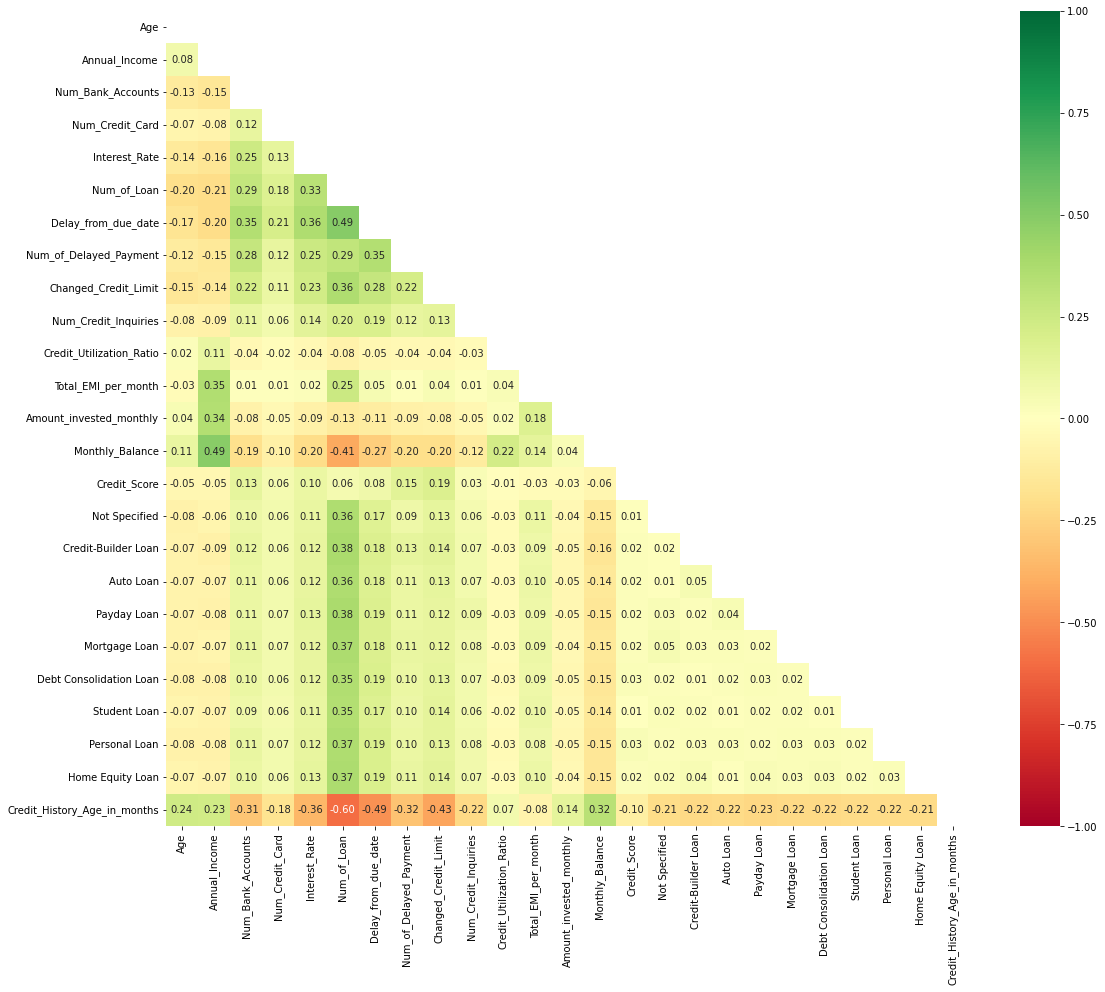

In [27]:
# double check the correlation matrix after applying transformations
fig = plt.figure(figsize=(18,15))
sns.heatmap(dfm_preprocess.corr(), mask=np.triu(np.ones_like(dfm_preprocess.corr(), dtype=bool)), 
            annot=True, fmt='.2f', cmap='RdYlGn', vmin=-1, vmax=1)
plt.show()

## 4.3 Changing Categorical Columns to Dummy Variables

In order to do predictions with Machine Learning models, features are required to be in numerical form. There are currently four 
categorical columns in our dataset (`Occupation`, `Credit_Mix`, `Payment_Behaviour` and `Payment_of_Min_Amount`). By doing 
this, a category can be numerically represented through values of 0 or 1 in their respective columns

In [28]:
# Turn categorical variables into dummy variables
dfm_preprocess = pd.get_dummies(dfm_preprocess, columns=['Occupation', 'Credit_Mix', 'Payment_Behaviour','Payment_of_Min_Amount'], drop_first=True)

## 4.4 Apply PCA to Visualize Credit Score Clusters

Principal Component Analysis (PCA) can be used as a dimension reduction technique in order to help reduce the dimensionality and complexity of datasets before model training. Before doing so, we want to apply 
PCA to our dataset to see whether the credit scores labels can be easily clustered.

Before PCA, scaling was applied in order to normalise the data

In [29]:
# Scale the dfm_preprocess and keep the scaled data in a new dataframe
scaler = MinMaxScaler()
dfm_to_scale = dfm_preprocess.drop(['Credit_Score'], axis=1)
dfm_scaled = pd.DataFrame(scaler.fit_transform(dfm_to_scale), columns=dfm_to_scale.columns)
dfm_scaled['Credit_Score'] = dfm_preprocess['Credit_Score']

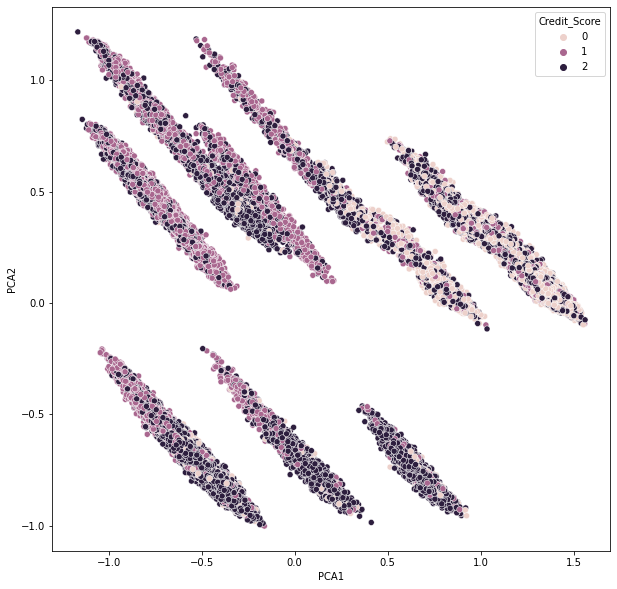

In [30]:
# Reduce the dimension of the data to 2 and visualize the data
pca = PCA(n_components=2)
pca_2 = pca.fit_transform(dfm_scaled.drop(['Credit_Score'], axis=1))
dfm_pca_2 = pd.DataFrame(pca_2, columns=['PCA1', 'PCA2'])
dfm_pca_2['Credit_Score'] = dfm_scaled['Credit_Score']

# visualize 2 components from PCA
plt.figure(figsize=(10,10))
ax= sns.scatterplot(data=dfm_pca_2, x='PCA1', y='PCA2', hue='Credit_Score')

However, this was not obvious, possibly due to non-linearity in our dataset.

The cumulative variance explained plot was also produced for the PCA in order to see the variance between each principal component. 

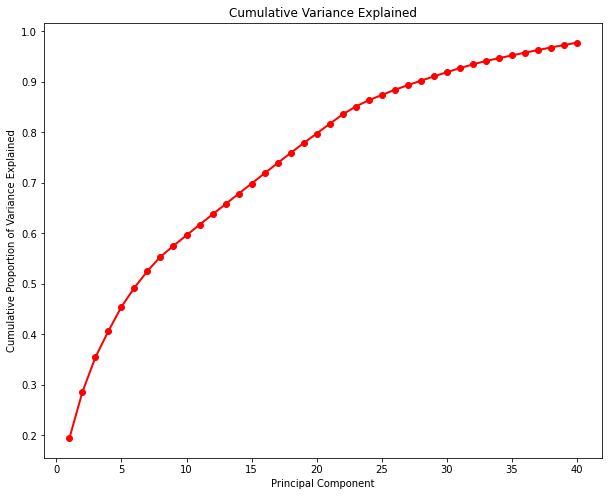

In [31]:
# Use PCA to reduce the dimension
pca = PCA(n_components=40)
pca.fit_transform(dfm_scaled.drop(['Credit_Score'], axis=1))

# cumulative of the variance explained
plt.figure(figsize=(10,8))
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, np.cumsum(pca.explained_variance_ratio_), 'ro-', linewidth=2)
plt.title('Cumulative Variance Explained')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.show()

## 4.5 Perform Stratified Sampling Onto Dataset

Stratified random sampling allows creating a training and test dataset that best represents the original dataset. It ensures that the proportion of each class (in this case, each credit score) 
remains consistent from training to testing.

The distribution of the class between training and test is verified after the split

In [32]:
# Split the data into train and test with stratified sampling
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
dfm_preprocess.reset_index(inplace=True)
for train_index, test_index in split.split(dfm_preprocess, dfm_preprocess['Credit_Score']):
    strat_others_set = dfm_preprocess.loc[train_index]
    strat_test_set = dfm_preprocess.loc[test_index]

y_test = strat_test_set['Credit_Score'].to_numpy()
X_test = strat_test_set.drop(['Credit_Score'], axis=1).to_numpy()

# inspect the split
print(strat_others_set['Credit_Score'].value_counts() / len(strat_others_set))
print(strat_test_set['Credit_Score'].value_counts() / len(strat_test_set))
dfm_preprocess.drop(['index'], axis=1, inplace=True)

2    0.525779
1    0.312501
0    0.161720
Name: Credit_Score, dtype: float64
2    0.525782
1    0.312505
0    0.161713
Name: Credit_Score, dtype: float64


To prepare our dataset for the model training, we converted both our stratified dataset into numpy arrays.

In [33]:
# convert to numpy array
X_others = strat_others_set.drop(['Credit_Score'], axis=1).to_numpy()
y_others = strat_others_set['Credit_Score'].to_numpy()

We splitted our 'other' dataset into train and validation for some specific model training i.e. neural networks.

In [34]:
# Split X_others and y_others into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_others, y_others, test_size=0.2, random_state=42)

## 4.6 Discussion - Pipeline

The application of PCA as a dimension reduction technique was previously mentioned. Although it can be used to help improve model performance, testing have shown that the model performed much better when the PCA was not applied.

Additionally, SMOTE is an additional preprocessing method used to deal with imbalanced datasets, where a specific class is either over- or under-represented. In this dataset, credit score was imbalanced, with standard being the majority class. However, during the PCA, we found that the segmentations were too clustered, and therefore applying SMOTE would not work on our dataset.

Because we opted not to apply PCA and SMOTE, we carried out our preprocessing outside the pipeline. 

The application of pipeline helps streamline the Machine Learning process and is useful to define the preprocessing in sequential steps. To illustrate its functionality, an example of the pipeline could come in this form:

``` Python
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline


# Define X and y values
X = dfm_preprocess.drop(['Credit_Score'], axis=1)
y = dfm_preprocess['Credit_Score']

# Create a Column Transformer
categorical_columns =['Occupation', 'Credit_Mix', 'Payment_Behaviour','Payment_of_Min_Amount']
numerical_columns = X_clean = X.drop(categorical_columns, axis=1).columns

transform_column = ColumnTransformer([
    ('num', MinMaxScaler(), numerical_columns),
    ('cat', OneHotEncoder(), categorical_columns)
])

# Create Pipeline
credit_score_pipeline = Pipeline([
    ('transform', transform_column),
    ('pca', PCA(n_components=25)),
    ('smote', SMOTE(random_state=66))
])

# After setting up the pipeline, the X_train can be fitted and transform.
# As a result, the X_val and X_test can be fed into the pipeline and 
# transformed so that it can be ready for the model.

X_train_modified = credit_score_pipeline.fit_transform(X_train)
X_val_modified = credit_score_pipeline.transform(X_val)
X_test_modified = credit_score_pipeline.transform(X_test)
```

# Part 5: Classification Models

The main purpose of the section is to build different classification models that could predict the credit score of the customers and choose the one that has better performance in terms of prediction accuracy.

## 5.1 Logistic Regression

The first model (__Baseline Model__) implemented to classify and predict the credit score of the customers was logistic regression for multi-classification, since the credit score of the customers can be 3 different values: Good, Standard and Poor.

In terms of the parameters used in the model, a basic model was built with default settings of the algorithm, setting 100 iterations for the solver to converge, with ridge penalty and a regularization strength of value 1. The results obtained from this basic model was a prediction accuracy of 53%.

By analysing the classification report, different combination of the parameters could be tried in the future to increase the prediction ability of the model to the Good class (label 0) in order to obtain a higher prediction accuracy for the model, such as changing the value of the regularization strength to larger values (for weaker regularization) or smaller values (for stronger regularization), among others.

In [35]:
# logistic regression for classification
lr = LogisticRegression(random_state=777)
lr.fit(X_others, y_others)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.32      0.02      0.05      3776
           1       0.53      0.20      0.29      7297
           2       0.54      0.89      0.67     12277

    accuracy                           0.53     23350
   macro avg       0.46      0.37      0.33     23350
weighted avg       0.50      0.53      0.45     23350



## 5.2 Decision Tree

The next classifier model implemented to the dataset is Decision Tree, which consists of segmenting the predictor space into simple regions and perform predictions on each region according to the most common occurring class.

### 5.2.1 Default parameters for Decision Tree

A basic model was tried at the beginning without specifying the hyperparameters, which performed an accuracy of 71%, significantly better than the logistic regression.

In [36]:
# basic decision tree
dt = DecisionTreeClassifier(random_state=555)
dt.fit(X_others, y_others)

# make predictions on test set
dt_pred = dt.predict(X_test)

# evaluate the model
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63      3776
           1       0.71      0.70      0.70      7297
           2       0.73      0.74      0.74     12277

    accuracy                           0.71     23350
   macro avg       0.69      0.69      0.69     23350
weighted avg       0.71      0.71      0.71     23350



The feature importance of a decision tree model provides information about those relevant variables that determined the credit score of a customer during the classification process.  In this case, the five most important variables of the model are `Credit_Utilization_Ratio`, `Num_of_Loan`, `Credit_Mix_Good`, `Age` and `Credit_History_Age_in_months`, respectively,  which are mainly related to the credit consuming behaviour of the customers.

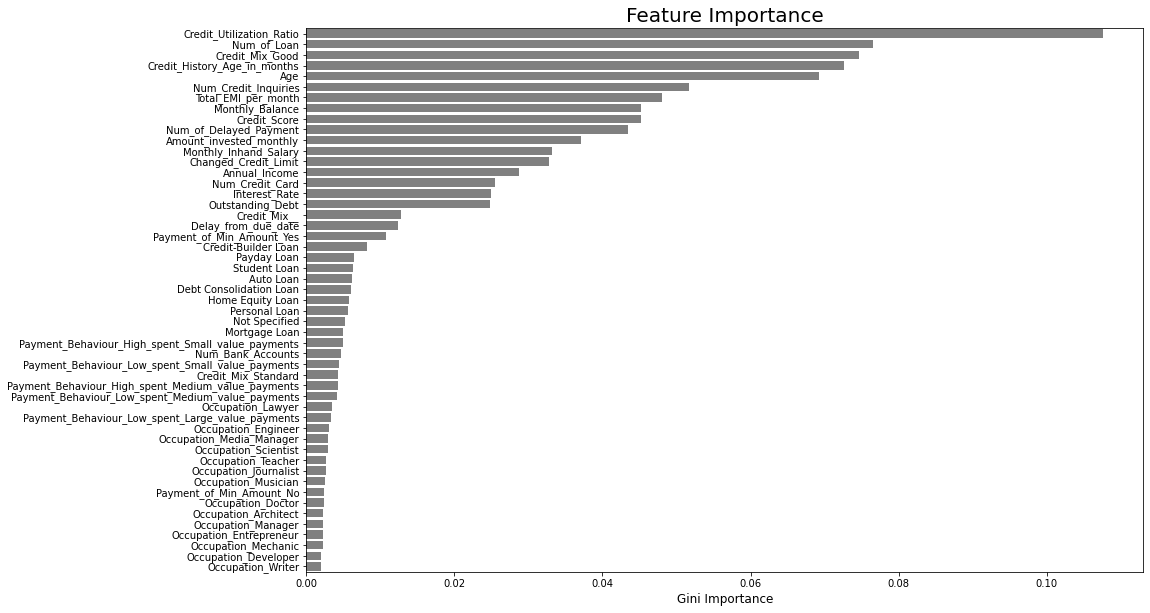

In [37]:
# plot variable importance of random forest
dt_importances = pd.Series(dt.feature_importances_, index=dfm_preprocess.columns).sort_values(ascending=False)

# fig, ax = plt.subplots()
fig = plt.figure(figsize=(15,10))
# plot barh
sns.barplot(x=dt_importances.values, y=dt_importances.index, color='grey')
# set title
plt.title('Feature Importance', fontsize=20)
# set labels
plt.xlabel('Gini Importance', fontsize=12)
plt.show()

### 5.2.2 Tune parameters using GridSearchCV for Decision Tree

In order to improve the accuracy of this model, GridSearchCV was implemented to identify the best parameters for the model. In this case, the most relevant parameters were selected to grid, such as the maximum depth of the tree, the minimum samples split and the minimum sample of leaves in the tree in order to adjust the possibility of overfitting issue in the model. The accuracy of the classification model by using the grid search improved to 72%, compared to the default one. The grid model utilised Gini impurity as the function to measure the quality of split, with a maximum depth of 12 per tree,  a minimum of 1 sample at the leaf node and a minimum of 2 samples to split the node.

The range of the grid parameters and the different combination of hyperparameters could be readjusted to obtain a better classification performance in the future.

In [38]:
# Set the parameters to tune
param_grid = [
        {'max_depth': [6, 10, 12], 
        'criterion': ['gini', 'entropy'],
        'min_samples_split': [2,3,4,5,6,7,8,9,10],
        'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]}]

# Apply the GridSearchCV
grid = GridSearchCV(dt,param_grid,refit=True,verbose=2)
grid.fit(X_others,y_others)

# Do the prediction with the best parameters of the gridSearch
grid_dt_predictions = grid.predict(X_test)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2; total time=   0.3s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2; total time=   0.3s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2; total time=   0.3s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2; total time=   0.3s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2; total time=   0.3s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=3; total time=   0.3s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=3; total time=   0.3s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=3; total time=   0.3s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=3; total time=   0.3s
[CV] END criterion=gini, max_depth=6, min_samples_leaf

In [39]:
print(classification_report(y_test,grid_dt_predictions))

              precision    recall  f1-score   support

           0       0.59      0.65      0.62      3776
           1       0.74      0.69      0.71      7297
           2       0.75      0.75      0.75     12277

    accuracy                           0.72     23350
   macro avg       0.69      0.70      0.69     23350
weighted avg       0.72      0.72      0.72     23350



In [40]:
# Get the best paramaters 
grid.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

## 5.3 Random Forest

Due to the good performance of the Decision Tree model, the Random Forest classifier was the next model that was used. Random Forest is an ensemble method consisting of multiple decision trees, which are aggregated and analysed through a bagging method. Random Forest generally performs better than Decision Trees, but are much more computationally intensive

### 5.3.1 Default Parameters for Random Forest

The basic model was built with the default parameters, with 100 trees for the random forest model, and each quality of split is judged by the Gini impurity value.

The model performed much better than the Decision Tree, with an accuracy of 80%. High performance of the Random Forest could suggest that this classifier is robust against the non-linear relationship of credit score data, which allowed a much better prediction of customer’s credit scores.

In [41]:
# Random Forest regression as a collection of decision trees
forest = RandomForestClassifier(random_state=777).fit(X_others, y_others)

y_pred = forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      3776
           1       0.79      0.83      0.81      7297
           2       0.81      0.81      0.81     12277

    accuracy                           0.80     23350
   macro avg       0.79      0.78      0.79     23350
weighted avg       0.80      0.80      0.80     23350



There are 5 variables that were identified to be the most important in determining and predicting Credit Scores of each customer. These had a Mean Decrease in Impurity (MDI) of higher than 0.05. They include: `Num_of_Loan`, `Credit_History_Age_in_months`, `Num_of_Delayed_Payment`, `Num_Credit_Inquiries` and `Credit_Utilization_Ratio`.

As we can see, some of the most relevant features of decision tree and random forest are the same, indicating high influence to the classification decision, which almost all of them are related to the credit behaviour and habits of the customers.

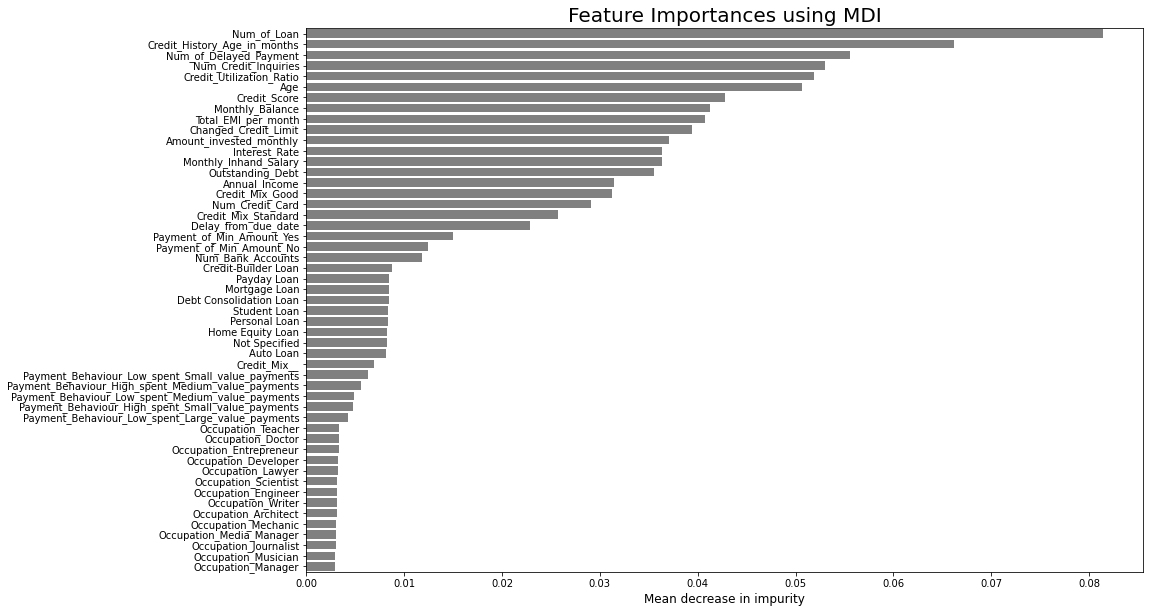

In [42]:
# plot variable importance of random forest
forest_importances = pd.Series(forest.feature_importances_, index=dfm_preprocess.columns).sort_values(ascending=False)

# fig, ax = plt.subplots()
fig = plt.figure(figsize=(15,10))
# plot barh
sns.barplot(x=forest_importances.values, y=forest_importances.index, color='grey')
# forest_importances.plot.bar(width=0.5)
# set title
plt.title('Feature Importances using MDI', fontsize=20)
# set labels
plt.xlabel('Mean decrease in impurity', fontsize=12)
plt.show()

### 5.3.2 Tune parameters using GridSearchCV for Random Forest

For Random Forest classification model, we have also implemented the GridSearch to try to improve the prediction accuracy of the model. In this case, two different methods were implemented to compare the results.

The first one was GridSearchCV, where we set the different parameters to tune with their respective value ranges. In this case, we focused on the most relevant parameters, such as the maximum number of depth for each tree, the maximum number of features to randomly select, and the number of trees in the forest. The model was run with 5-fold cross-validation approach to control the correlation between trees. The final model consists of using 250 trees for prediction, using 7 randomly selected features (sqrt of 51 features) to build each tree and no limit for the maximum depth of the trees for classification, which resulted in an accuracy of 80%.

In [43]:
# Set the parameters to tune
param_grid = [
        { 'bootstrap': [True], 'max_depth': [None], 'max_features': ['sqrt'], 
        'n_estimators': [50, 100,150, 200, 250,300]}]

# Apply the GridSearchCV
grid_forest = GridSearchCV(forest,param_grid,refit=True,verbose=2, cv=5)
grid_forest.fit(X_others,y_others)

# Predict with the best parameters
grid_rf_predictions = grid_forest.predict(X_test)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=50; total time=   4.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=50; total time=   4.5s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=50; total time=   4.5s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=50; total time=   4.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=50; total time=   4.5s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=100; total time=   9.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=100; total time=   9.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=100; total time=   9.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=100; total time=   9.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators

In [44]:
print(classification_report(y_test,grid_rf_predictions))

              precision    recall  f1-score   support

           0       0.77      0.72      0.75      3776
           1       0.79      0.83      0.81      7297
           2       0.82      0.81      0.81     12277

    accuracy                           0.80     23350
   macro avg       0.79      0.79      0.79     23350
weighted avg       0.80      0.80      0.80     23350



In [45]:
# Get the best parameter for the rf model
grid_forest.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 250}

### 5.3.3 Tune parameters using RandomizedSearchCV for Random Forest

Another grid search method used was the RandomizedSearchCV, which does not apply all the parameter values specified, but a fixed number is sampled to the distributions. In this case, we set some ranges of parameters such as, the maximum depth of the tree, the criterion of quality split, the minimum number of samples for split, the minimum samples in each leaf and the number of trees in the model. The results of the grid search was a model with 100 trees for the prediction, minimum 7 samples for split with at least 1 number of samples in each leaf, with no maximum depth for each tree and using Gini as the quality split method. The output of the model was 77% of prediction accuracy, which is 3% lower than GridSearchCV model.

From the results obtained by trying different parameters of Random Forest classification model, we could see that their performances are similar, indicating the robustness of the classifier, which is not easily influenced by the variation in the training set.

In [46]:
param_grid2 = [
        {'max_depth': [None, 1, 2, 4, 6, 8, 10], 
        'criterion': ['gini', 'entropy'],
        'min_samples_split': [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)],
        'min_samples_leaf': [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)],
        'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 300, num = 6)],
        'bootstrap': [True, False]
        }]

random_rf = RandomizedSearchCV(forest, param_grid2, random_state=777)
random_rf.fit(X_others, y_others)

randomized_forest = RandomForestClassifier(n_estimators= 250,
                                        min_samples_split= 3,
                                        min_samples_leaf= 5,
                                        max_depth= None,
                                        criterion='gini',
                                        bootstrap= True).fit(X_train, y_train)

# Predict with the best parameters
randomized_predictions = randomized_forest.predict(X_test)
print(classification_report(y_test,randomized_predictions))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      3776
           1       0.78      0.78      0.78      7297
           2       0.80      0.80      0.80     12277

    accuracy                           0.77     23350
   macro avg       0.76      0.76      0.76     23350
weighted avg       0.77      0.77      0.77     23350



In [47]:
# Get the best parameter for the rf model
random_rf.best_params_

{'n_estimators': 100,
 'min_samples_split': 7,
 'min_samples_leaf': 1,
 'max_depth': None,
 'criterion': 'gini',
 'bootstrap': False}

## 5.4 Neural Network

Another classification model that we have implemented is the neural network, which is a frequently used approach to predict the credit score of customers in banks. In this case, we have built two different neural networks, simple and convolutional, to compare their prediction performance on the dataset.

### 5.4.1 Simple NN model

In terms of the simple neural network architecture, we built a simple network with two dense layers of 40 and 20 neurons in each layer respectively with ‘relu’ activation functions, and an output layer of 3 neurons with ‘softmax’ activation, since it is a multi-classification task of 3 labels.

The accuracy of the model was 53%, which is similar to the logistic regression, but the trade-off in terms of computational costs between these two models should be considered as well.

For future analysis, the model could be tuned with different combination of hyperparameters, such as the number of layers in the network and the number of neurons per layer, the number of training epochs as well as the type of optimizer to use and its learning rate, which might significantly increase the prediction accuracy of the model.

In [48]:
class NeuralNetwork:
    def __init__(self, X_train: np.array, X_val: np.array, X_test: np.array, y_train: np.array, y_val: np.array, y_test: np.array) -> None:
        self.X_train = X_train
        self.X_val = X_val
        self.X_test = X_test
        self.y_train = y_train
        self.y_val = y_val
        self.y_test = y_test
        self.model = None
        self.create_model()

    def create_model(self) -> None:
        model = tf.keras.models.Sequential(
            [
                tf.keras.layers.Dense(units=40, input_shape=(
                    self.X_train.shape[1],), activation='relu'),
                tf.keras.layers.Dense(units=20, activation='relu'),
                tf.keras.layers.Dense(units=3, activation='softmax')
            ]
        )
        self.model = model

    def train(self) -> None:
        early_stopping_cb = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', patience=10)
        self.model.compile(
            optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return self.model.fit(self.X_train, self.y_train, epochs=70, validation_data=(
            self.X_val, self.y_val), callbacks=[early_stopping_cb],batch_size=32)

    def predict(self, X: np.array) -> np.array:
        return self.model.predict(X).argmax(axis=1)
    
    def evalute(self) -> None:
        return self.model.evaluate(self.X_test, self.y_test)

In [49]:
# train the neural network
np.random.seed(777)
tf.random.set_seed(777)
nn = NeuralNetwork(X_train, X_val, X_test, y_train, y_val, y_test)
nn.train()

Epoch 1/70
1363/1363 [==============================] - 2s 787us/step - loss: 32.1318 - accuracy: 0.4343 - val_loss: 48.9820 - val_accuracy: 0.3172
Epoch 2/70
1363/1363 [==============================] - 1s 682us/step - loss: 19.8266 - accuracy: 0.4720 - val_loss: 17.2384 - val_accuracy: 0.4057
Epoch 3/70
1363/1363 [==============================] - 1s 724us/step - loss: 15.5657 - accuracy: 0.4859 - val_loss: 4.9687 - val_accuracy: 0.5747
Epoch 4/70
1363/1363 [==============================] - 1s 722us/step - loss: 12.9002 - accuracy: 0.4971 - val_loss: 5.3600 - val_accuracy: 0.5714
Epoch 5/70
1363/1363 [==============================] - 1s 710us/step - loss: 9.9607 - accuracy: 0.5009 - val_loss: 12.7641 - val_accuracy: 0.5494
Epoch 6/70
1363/1363 [==============================] - 1s 704us/step - loss: 8.2263 - accuracy: 0.4964 - val_loss: 14.9160 - val_accuracy: 0.5307
Epoch 7/70
1363/1363 [==============================] - 1s 682us/step - loss: 5.8774 - accuracy: 0.4980 - val_loss: 

In [50]:
# make predictions and evaluate the model
print(classification_report(y_test,nn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.00      0.01      3776
           1       0.73      0.00      0.01      7297
           2       0.53      1.00      0.69     12277

    accuracy                           0.53     23350
   macro avg       0.67      0.34      0.23     23350
weighted avg       0.63      0.53      0.37     23350



### 5.4.2 CNN model

Another type of neural network built was a more complexed convolutional neural network. In this case, we have created a model with 2 layers of 1 dimension convolution, since we have numerical inputs, with 64 and 32 filters, respectively, of size 3. A max pooling layer was added to summarize the information from the previous layers and 3 neurons with ‘softmax’ activation in the output layer for multi-classification. The accuracy of the model is 68%, which is significantly better than the simple neural network.

The model could be further tuned with the parameters mentioned in the previous section, as well as the kernel size and adding other layers to the model to try to improve the prediction performance of each class.

In [51]:
class CNN():
    def __init__(self, X_train: np.array, X_val: np.array, X_test: np.array, y_train: np.array, y_val: np.array, y_test: np.array) -> None:
        self.X_train = X_train
        self.X_val = X_val
        self.X_test = X_test
        self.y_train = y_train
        self.y_val = y_val
        self.y_test = y_test
        self.model = None
        self.create_model()

    def create_model(self) -> None:
        model = tf.keras.models.Sequential(
            [
                tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(self.X_train.shape[1], 1)),
                tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'),
                tf.keras.layers.MaxPooling1D(pool_size=2),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(units=3, activation='softmax')
                ]
        )
        self.model = model

    def train(self) -> None:
        early_stopping_cb = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', patience=10)
        self.model.compile(
            optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return self.model.fit(self.X_train, self.y_train, epochs=50, validation_data=(
            self.X_val, self.y_val), callbacks=[early_stopping_cb],batch_size=32)

    def predict(self, X: np.array) -> np.array:
        return self.model.predict(X).argmax(axis=1)
    
    def evalute(self) -> None:
        return self.model.evaluate(self.X_test, self.y_test)

In [52]:
# train the CNN
np.random.seed(777)
tf.random.set_seed(777)
cnn = CNN(X_train, X_val, X_test, y_train, y_val, y_test)
cnn.train()

Epoch 1/50
1363/1363 [==============================] - 4s 3ms/step - loss: 22.8150 - accuracy: 0.4594 - val_loss: 16.9676 - val_accuracy: 0.3429
Epoch 2/50
1363/1363 [==============================] - 3s 3ms/step - loss: 5.8718 - accuracy: 0.5136 - val_loss: 11.2190 - val_accuracy: 0.3391
Epoch 3/50
1363/1363 [==============================] - 3s 2ms/step - loss: 3.2147 - accuracy: 0.5264 - val_loss: 2.6524 - val_accuracy: 0.5577
Epoch 4/50
1363/1363 [==============================] - 3s 2ms/step - loss: 1.9338 - accuracy: 0.5499 - val_loss: 1.7100 - val_accuracy: 0.4482
Epoch 5/50
1363/1363 [==============================] - 3s 2ms/step - loss: 1.1628 - accuracy: 0.5804 - val_loss: 0.8190 - val_accuracy: 0.6086
Epoch 6/50
1363/1363 [==============================] - 3s 2ms/step - loss: 0.9076 - accuracy: 0.6067 - val_loss: 0.7843 - val_accuracy: 0.6236
Epoch 7/50
1363/1363 [==============================] - 3s 2ms/step - loss: 0.7558 - accuracy: 0.6455 - val_loss: 0.7378 - val_accura

In [53]:
# make predictions and evaluate the model
print(classification_report(y_test,cnn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.59      0.50      0.54      3776
           1       0.69      0.67      0.68      7297
           2       0.70      0.75      0.73     12277

    accuracy                           0.68     23350
   macro avg       0.66      0.64      0.65     23350
weighted avg       0.68      0.68      0.68     23350



## 5.5 SVM model

The Support Vector Machine classifier model was also applied to the dataset for the prediction task, which is based on separating hyperplanes to classify the observations of each class.

As we have seen previously, the dataset seems to be non-linear, which means that the projection of the observations to a higher dimension space would be required to determine the separating hyperplanes. Therefore, we have decided to implement the radial and polynomial kernels to the dataset for the classification of the credit score.

### 5.5.1 Radial Basis Function Kernel (RBF)

For the radial basis function kernel, we have chosen a gamma coefficient of 0.5, which is the influence distance that a single training observation can reach (the lower the value, the further the influence, and vice versa). Another relevant parameter for the model is the C parameter, 0.1 in this case, which determines the tolerance and severity of the violations to the margin and hyperplane when classifying (the larger the C parameter, the wider is the margin hence, more number of observations will be allowed to be misclassified). The output from the model was a classification accuracy of 53%, which is not good. By analysing the classification report, we could see that the model is classifying all the observations to class 2, the Standard credit score, which means that the model is not able to separate the classes clearly through the hyperplanes.

In [54]:
# Radial basis function kernel
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1, random_state=777).fit(X_others, y_others)
rbf_pred = rbf.predict(X_test)
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')

In [55]:
print(classification_report(y_test, rbf_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3776
           1       0.00      0.00      0.00      7297
           2       0.53      1.00      0.69     12277

    accuracy                           0.53     23350
   macro avg       0.18      0.33      0.23     23350
weighted avg       0.28      0.53      0.36     23350



### 5.5.2 Polynomial Kernel

In terms of the polynomial kernel, we have chosen a model of degree 5, and 0.1 for the C parameter. The results obtained were the same as the radial basis function kernel, with 53% of accuracy and predicting all the observations to Standard, which is the majority class in the dataset.

For future analysis, both models could be further tuned in terms of the degree, the C parameter and the gamma value to potentially increase the prediction performance of the models. However, as we have seen previously, the distribution of the observations on 2 dimension PCA plot above shows that they are not following either radial or polynomial shape of distribution. In this case, it would be difficult for SVM to clearly separate the different classes through hyperplanes therefore, the bad performance of these model could be foreseen.

In [56]:
# Polynomial kernel
poly = svm.SVC(kernel='poly', degree=4, C=1, random_state=777).fit(X_others, y_others)

# make predictions
poly_pred = poly.predict(X_test)

# evaluate the model
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')

In [57]:
print(classification_report(y_test, poly_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3776
           1       0.00      0.00      0.00      7297
           2       0.53      1.00      0.69     12277

    accuracy                           0.53     23350
   macro avg       0.18      0.33      0.23     23350
weighted avg       0.28      0.53      0.36     23350



## 5.6 GradientBoosting Classifier

The last model that we have implemented is the Gradient Boosting Classifier, which consists of combining different learning models (typically decision trees) together to create a strong predictive model by giving more relevance to the misclassified observations during the training process. 

A basic model of GradientBoosting was created by setting the number of estimators to 200, which is the number of trees to use, and the learning rate of each tree to 0.5. The rest of the parameters were retained to the default settings which resulted in 75% accuracy, a considerably good performance.

By analysing the classification report, we could see that the model was able to capture the characteristics of each different class to do the classification task. This gives an insight that it is a good model to consider for future analysis and to try to tune the parameters mentioned to further improve its classification performance. Furthermore, the advantage of implementing Gradient Boosting compared to Decision Tree is that it can avoid the overfitting problem that Decision Tree models might face frequently.

In [58]:
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5,random_state=42)

gb.fit(X_others, y_others)

gb_pred = gb.predict(X_test)

In [59]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.67      0.64      0.65      3776
           1       0.75      0.74      0.75      7297
           2       0.76      0.78      0.77     12277

    accuracy                           0.75     23350
   macro avg       0.73      0.72      0.72     23350
weighted avg       0.75      0.75      0.75     23350



## 5.7 Model Comparisons

Comaprison of the models used to predict the credit score of the customers based on accuracy. The best model is the Random Forest model, with an accuracy of 80%.

| Model | Best % Accuracy |
| --- | --- |
| Logistic Regression (Baseline Model) | 53 |
| Decision Tree | 72 |
| Random Forest | __80__ |
| Simple Neural Network | 53 |
| Convolutional Neural Network | 68 |
| Support Vector Machine | 53 |
| Gradient Boosting | 75 |

# Part 6: Conclusions - Business Insights

## 6.1 Final Model - Random Forest

This study presents the comparative performance analysis between different classification approaches on credit score predictions. It was observed that the random forest classifier performed the best on our dataset, with an accuracy of 80%. Although hyperparameter tuning was carried out through both GridSearchCV and RandomizedSearchCV, the accuracy did not   improve, and as a result, the base RF classifier was chosen as the final model.

Random Forest as the final choice of model was suitable in both academic and business prospects. From an academic point of view, ensemble methods have been observed to perform  well in credit scoring models. In 2020, a study comparing ensemble learning to baseline classifiers on credit scoring saw higher performance in ensemble learning than the individual learners. In particular, random forest performed the best in accuracy, AUC, Kolmogorov-Smirnov statistic and Brier score (Weidong, 2020). Furthermore, in Kuppili’s study in 2019, the ensemble method showed good accuracy performances on many credit scoring datasets (Kuppili, 2019). However, it is also important to note that many literature reviews have cited the use of other classification models for classifying credit scores. In Tripathi’s literature survey, while Ensemble models were found to be the most used approach, Support Vector Machine (SVM) was the third most used approach for credit score prediction, with Artificial Neural Networks (ANN) being the fourth most used (Tripathi, 2021). In Kuppili’s study, 45 references were collected that detailed the accuracy of both SVM and ANN on various credit scoring datasets (Kuppili, 2019). While literatures have supported the use of various models, its performances are also dependent on the dataset itself. In this case, Random Forest showed the best performance.

From a business standpoint, random forest allows the features to be easily interpreted in terms of importance. This is ideal when it comes to gaining business insights as it allows the understanding of the model’s internal choices, avoiding the the black box problem commonly observed in complex machine learning models.

### 6.1.1 Confusion Matrix

In the context of credit scoring, wrongly classifying customer’s credit scores may prove financially costly to finance companies. Credit score lies as an underlying basis in a finance company’s decision to grant credits, where individuals within the ‘Poor’ credit score bracket are more likely to default than those with ‘Good’ or ‘Standard’ scores. As a result, finance companies can use the model to grant credits to clients with ‘Good’ and ‘Standard’ scores (where those with ‘Good’ scores would get better credit conditions such as lower interest rates and better premiums), while not giving to those with a ‘Poor’ score.

Confusion matrix is a performance measurement tool that allows us to interpret both our correct (True Positive and Negative) and wrong predictions (False Positive and Negative). However, in the case of our multiclass dataset, there is further complexity. In an instance where a customer with a true Credit Score label of ‘Good’ is predicted with a wrong label (a False Negative), its predicted label can either be ‘Standard’ or ‘Poor’. It is important to distinguish specific misclassifications that are more costly than others. Although precision and recall values can be used to define the metrics from confusion matrix, putting context onto the misclassification types will allow better business insights. Finance companies can design to target the minimisation of each of these misclassifications in order to achieve their specific objectives.

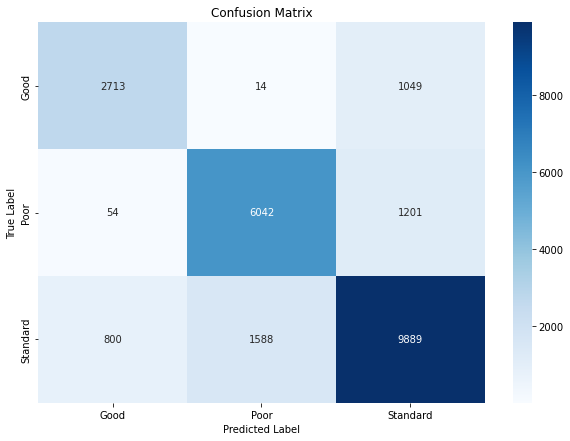

In [60]:
# plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, forest.predict(X_test)), annot=True, fmt='d', cmap='Blues')
# change label to match credit_score_dict
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
# change label to match credit_score_dict
plt.yticks(ticks = [0.5, 1.5 , 2.5], labels = ['Good', 'Poor', 'Standard'])
plt.xticks(ticks = [0.5, 1.5 , 2.5], labels = ['Good', 'Poor', 'Standard'])
plt.show()

The first misclassification to note is customers predicted to have either ‘Good’ or ‘Standard’ credit score, but has a true credit score label of ‘Poor’ (a total of 5.3% in our prediction model). In this case, this would prove costly to financial institutions as defaults are more likely to happen upon credit granting.

The second misclassification to note is clients with true ‘Good’ or ‘Standard’ credit scores were put into the ‘Poor’ credit score bracket (a total of 6.9%). This misclassification may not be as costly as the first one mentioned, but are unrealised potential revenues that result in not granting credits.

The third misclassification is in two instances when Good is predicted as Standard, and Standard is predicted as Good (a total of 7.8%). This misclassification is not as negatively impactful as the previous two scenarios as both are granted credits, but differ in loan conditions such as interest rates and premiums offered.

In [61]:
# Credit Score dictionary
credit_score_dict = dict(zip(dfm_preprocess['Credit_Score'].unique(), dfm['Credit_Score'].unique()))
print(credit_score_dict)

cm = confusion_matrix(y_test, forest.predict(X_test))

misclass1 = cm[1][0] + cm[1][2]
print('Misclassification 1: ',round(misclass1/len(X_test)*100,1),'%')

misclass2 = cm[0][1] + cm[2][1]
print('Misclassification 2: ', round(misclass2/len(X_test)*100,1),'%')

misclass3 = cm[2][0] + cm[0][2]
print('Misclassification 3: ',round(misclass3/len(X_test)*100,1),'%')

{0: 'Good', 2: 'Standard', 1: 'Poor'}
Misclassification 1:  5.4 %
Misclassification 2:  6.9 %
Misclassification 3:  7.9 %


## 6.2 Context of Credit Scoring and Machine Learning

From our RF classifier we can see that the top 3 most important features are the number of loans, credit history age and number of delayed payments. These are indeed features that would directly affect creditworthiness assuming a customer has already taken a loan. 

More importantly are the features that affect creditworthiness regardless of whether a customer has a loan or not. The World Bank (2021) estimates that globally there are 1.7 billion adults who are unbanked and a large number of those people live in the developing world while 56% of them are women. With this in mind, banks can explore new ways in assessing creditworthiness through the use of machine learning and AI such as age, occupation and annual income in our case.

Machine learning models can more accurately predict who has a better credit score than traditional approaches. The innovation of machine learning models are advantageous to both banks and customers. Banks can improve their risk management, and increase their customer base as they can now offer credit to those previously who wouldn’t have been accepted. On the other hand, consumers can better understand the factors and how their credit score is affected. In 2020, Equifax launched its own AI model called “NeuroDecision” which generates logical and actionable explanations tailored to individual credit score (Bloomberg, 2020). This can also be seen in our case as we can easily rank the features or variables that affect credit worthiness the most through the RF classifier. As previously mentioned, the interpretation of important features will help alleviate the black box problem observed in complex machine learning models, and drive better decision making for financial companies.

Many studies segmented credit score models based on different categories and risks. A study by Paleologo in 2010 on credit score models mentioned about how credit scorings can be broken down into multiple risks. This includes application scoring (social, demographic and financial information of customers) behavioral scoring (consumer’s borrowing behavioral patterns) and collection scoring (levels of insolvency). Furthermore, a study by Kumar broke down the credit scoring process into 4 components: Expected Loss, Probability of Default, Exposure at Default and Loss Given Default (Kumar, 2021). However, these components seemed to only cover the credit behaviours. Nevertheless, it may indicate that credit score features could either cover depth or breadth.

Perhaps by looking at our features under the same light, it can be segmented along similar categories. Interestingly, in our feature importance table (see Section 5.3.1), only 1 feature from the top 10 most important features was unrelated to credit (`Age`), while `Occupation` was one of the least important in predicting credit scores. This could suggest that application profiles are not that important. Further "application scoring" features could be explored such as education background, marital status and number of children. However, from this analysis, we can conclude that behaviours relating to credit borrowing such as  `Number of loans` , `Credit history`,  `Number of delayed payments` , `Number of credit inquiries` and `Credit utilisation ratio` are the important features that determine a customer’s credit score in our model.

## 6.3 Discussion

Overall, the application of machine learning models for credit score predictions was explored, with the random forest classifier having the best performance. The cleaning and preprocessing methodologies were thoroughly explained to validate our design choices , emphasising the importance in detecting and repairing errors as well as transforming our dataset to suit our training objectives. 

Further studies can look into analysing another dimension of the credit score dataset. The time element of the dataset was removed as a result of dropping the `Month` column. Because of this, we made the assumption that each row of data is independent to each other. However, the time series data could be considered to build a credit score prediction model for existing customers. More specifically, an LSTM model can be trained with 4 months of data (January to April), validate with 2 months (May and June) before testing with the last 2 months (July and August). This can be used to build a credit score prediction model for customers beyond August (e.g. September and October).

# Reference list

Bloomberg.com. 2022. *Equifax AI Innovation Opens Doors to Millions Seeking Credit*
. [online] Available at: <https://www.bloomberg.com/press-releases/2020-02-06/equifax-ai-innovation-opens-doors-to-millions-seeking-credit> [Accessed 17 July 2022].

Genest, B. and Brie, L., 2013. Basel 2 IRB Risk Weight Functions: Demonstration &amp; Analysis. *SSRN Electronic Journal*

Ha, V. and Nguyen, H., 2016. Credit scoring with a feature selection approach based deep learning. *MATEC Web of Conferences*, 54, p.05004.

Kumar, A., Shanthi, D. and Bhattacharya, P., 2021. Credit Score Prediction System using Deep Learning and K-Means Algorithms. *Journal of Physics: Conference Series*, 1998(1), p.012027.

Kuppili, V., Tripathi, D. and Reddy Edla, D., 2019. Credit score classification using spiking extreme learning machine. *Computational Intelligence*, 36(2), pp.402-426.

Li, Y. and Chen, W., 2020. A Comparative Performance Assessment of Ensemble Learning for Credit Scoring. *Mathematics*, 8(10), p.1756.

Statista. 2022. *UK: total gross consumer lending 2022 | Statista*. [online] Available at: <https://www.statista.com/statistics/311415/uk-lending-total-gross-consumer-lending-in-the-united-kingdom/> [Accessed 17 July 2022].

World Bank Blogs. 2022. *Leveraging big data and machine learning in credit reporting*. [online] Available at: <https://blogs.worldbank.org/developmenttalk/leveraging-big-data-and-machine-learning-credit-reporting> [Accessed 17 July 2022].